<a href="https://colab.research.google.com/github/BaptisteFra802/Hydronauts/blob/master/Random_forest_baptiste_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.6860986547085202
Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.52      0.58        50
           2       0.69      0.62      0.65        58
           3       0.61      0.81      0.70        70
           4       0.87      0.76      0.81        45

    accuracy                           0.69       223
   macro avg       0.71      0.68      0.69       223
weighted avg       0.70      0.69      0.68       223



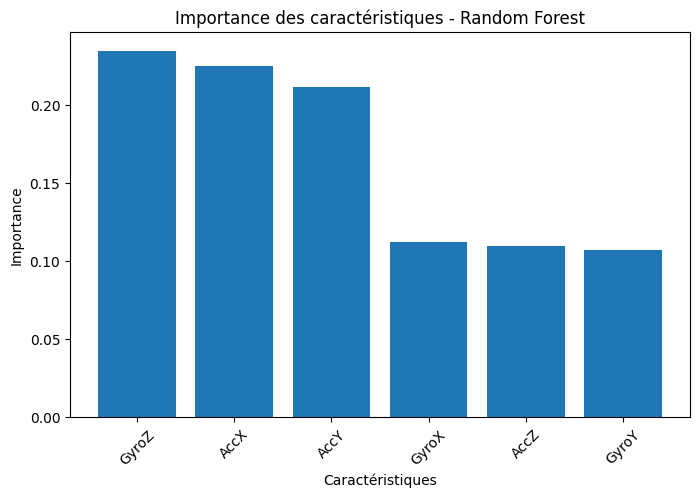

In [20]:
import pandas as pd

# Charger le fichier CSV
file_path = "sensor_raw.csv"
df = pd.read_csv(file_path)

# Afficher les premières lignes pour examiner la structure des données
df.head()

# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()

# Vérifier les types de données
data_types = df.dtypes

missing_values, data_types

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparer les caractéristiques (X) et la cible (y)
X = df.drop(columns=["Target(Class)"])
y = df["Target(Class)"]

# Normalisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division en ensemble d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Vérifier la taille des ensembles
X_train.shape, X_test.shape


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialisation et entrainement de modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

import matplotlib.pyplot as plt
import numpy as np

# Récupérer l'importance des caractéristiques
importances = rf_model.feature_importances_
feature_names = X.columns  # Récupérer les noms des colonnes

# Trier par importance décroissante
indices = np.argsort(importances)[::-1]

# Afficher les résultats sous forme de graphique
plt.figure(figsize=(8, 5))
plt.title("Importance des caractéristiques - Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Caractéristiques")
plt.ylabel("Importance")
plt.show()


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Charger les données
df = pd.read_csv("sensor_raw.csv")

# Séparer les caractéristiques et la cible
X = df.drop(columns=["Target(Class)"])
y = df["Target(Class)"]

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape pour LSTM (ajout d'une dimension temporelle)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Encoder la variable cible en one-hot (nécessaire pour classification avec LSTM)
y_categorical = to_categorical(y - 1)  # Ajustement des labels si nécessaire

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42, stratify=y)

# Construire le modèle LSTM
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')  # Softmax pour multi-classification
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3258 - loss: 1.3831 - val_accuracy: 0.3857 - val_loss: 1.3687
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3761 - loss: 1.3659 - val_accuracy: 0.3991 - val_loss: 1.3157
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3834 - loss: 1.3129 - val_accuracy: 0.4036 - val_loss: 1.2200
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3661 - loss: 1.2313 - val_accuracy: 0.4619 - val_loss: 1.1228
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4859 - loss: 1.1418 - val_accuracy: 0.5426 - val_loss: 1.0532
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5557 - loss: 1.0794 - val_accuracy: 0.5695 - val_loss: 0.9944
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5748 - loss: 0.9756 - val_accuracy: 0.5695 - val_loss: 0.9469
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5827 - loss: 0.9557 - val_accuracy: 0.5874 - val_loss: 0.9165
Ep

In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialiser et entraîner le modèle SVM avec noyau RBF
svm_model = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svm_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_svm = svm_model.predict(X_test)

# Évaluation du modèle
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)

Accuracy: 0.6412556053811659
Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.44      0.55        50
           2       0.85      0.40      0.54        58
           3       0.50      0.91      0.64        70
           4       0.92      0.76      0.83        45

    accuracy                           0.64       223
   macro avg       0.75      0.63      0.64       223
weighted avg       0.73      0.64      0.63       223



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        70
           4       1.00      1.00      1.00        44

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



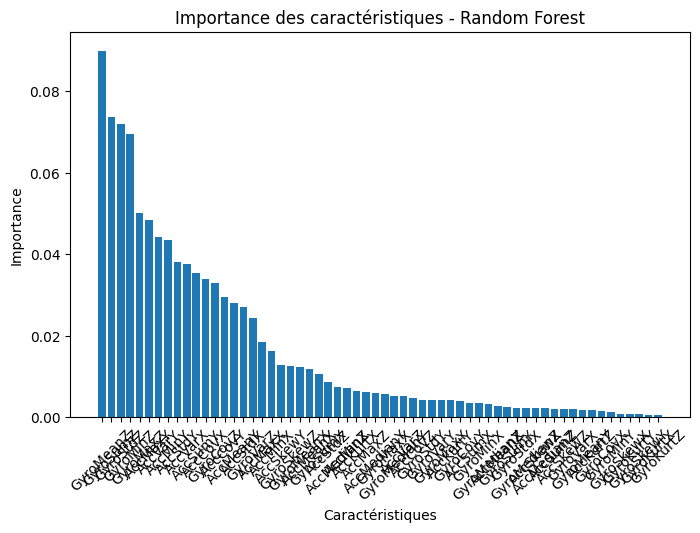

In [22]:
import pandas as pd

# Charger le fichier CSV
file_path = "features_14.csv"
df = pd.read_csv(file_path)

# Afficher les premières lignes pour examiner la structure des données
df.head()

# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()

# Vérifier les types de données
data_types = df.dtypes

missing_values, data_types

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparer les caractéristiques (X) et la cible (y)
X = df.drop(columns=["Target"])
y = df["Target"]

# Normalisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division en ensemble d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Vérifier la taille des ensembles
X_train.shape, X_test.shape


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialisation et entrainement de modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

import matplotlib.pyplot as plt
import numpy as np

# Récupérer l'importance des caractéristiques
importances = rf_model.feature_importances_
feature_names = X.columns  # Récupérer les noms des colonnes

# Trier par importance décroissante
indices = np.argsort(importances)[::-1]

# Afficher les résultats sous forme de graphique
plt.figure(figsize=(8, 5))
plt.title("Importance des caractéristiques - Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Caractéristiques")
plt.ylabel("Importance")
plt.show()


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialiser et entraîner le modèle SVM avec noyau RBF
svm_model = SVC(kernel="rbf", C=1, gamma="scale", random_state=42)
svm_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_svm = svm_model.predict(X_test)

# Évaluation du modèle
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)

Accuracy: 0.995475113122172
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        50
           2       1.00      0.98      0.99        57
           3       0.99      1.00      0.99        70
           4       1.00      1.00      1.00        44

    accuracy                           1.00       221
   macro avg       1.00      1.00      1.00       221
weighted avg       1.00      1.00      1.00       221



In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Charger les données
df = pd.read_csv("sensor_raw.csv")

# Séparer les caractéristiques et la cible
X = df.drop(columns=["Target(Class)"])
y = df["Target(Class)"]

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape pour LSTM (ajout d'une dimension temporelle)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Encoder la variable cible en one-hot (nécessaire pour classification avec LSTM)
y_categorical = to_categorical(y - 1)  # Ajustement des labels si nécessaire

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42, stratify=y)

# Construire le modèle LSTM
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')  # Softmax pour multi-classification
])

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3472 - loss: 1.3821 - val_accuracy: 0.3857 - val_loss: 1.3627
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3590 - loss: 1.3584 - val_accuracy: 0.3901 - val_loss: 1.2891
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3985 - loss: 1.2871 - val_accuracy: 0.4036 - val_loss: 1.1787
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3861 - loss: 1.2201 - val_accuracy: 0.3991 - val_loss: 1.1361
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4199 - loss: 1.1506 - val_accuracy: 0.5157 - val_loss: 1.0840
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5679 - loss: 1.0511 - val_accuracy: 0.5874 - val_loss: 1.0098
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5844 - loss: 0.9761 - val_accuracy: 0.5919 - val_loss: 0.9377
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6105 - loss: 0.8490 - val_accuracy: 0.5874 - val_loss: 0.9094
Ep